# Script containing drawn samples, test statistics, strategy, etc. for project 3

### Facts:
##### $\bullet$ There are 7 nodes 
##### $\bullet$ There is one hidden node
##### $\bullet$ H is a confounder for 2 of the other nodes
##### $\bullet$  The variables that H is a confounder for are NOT directly linked


##### $\bullet$ The file with no intervention 98 samples is called: "data_98_observational.csv" 

## General setup:
### Write down exactly what was done when sampling in a markdown cell above the code
### Do statistics

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [41]:
def load(filename):
    df = pd.read_csv('data/'+str(filename))
    data = df.to_numpy()
    return data, df


In [42]:
filename = "data_98_observational.csv"
data, df = load(filename)

In [43]:
def mean(A):
    return np.mean(A, axis=0)
def var(A):
    return np.var(A, axis=0)
def cor(A):
    return np.correlate(A, axis=0)


In [44]:
df.drop(columns=df.columns[0], 
        axis=1, 
        inplace=True)
        
df.describe()

,A,B,C,D,E,F
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,1.492477,-0.183032,-0.388332,1.145678,-0.019831,-0.668970
std,1.053181,1.998687,1.544932,1.170557,0.203124,0.781923
min,-0.548616,-7.885692,-2.339222,-1.035836,-0.576186,-2.585362
25%,0.721823,-1.035442,-1.870859,0.285727,-0.122503,-1.243673
50%,0.997897,-0.023420,-0.955102,1.432536,-0.014553,-0.742486
75%,2.598267,0.375455,1.020799,2.108453,0.069367,-0.086572
max,2.999937,10.306302,2.330058,2.721275,0.480917,0.916239


In [45]:
print(mean(data))
print(var(data))
#print(cor(data))



[ 4.85000000e+01  1.49247723e+00 -1.83031698e-01 -3.88331819e-01
  1.14567763e+00 -1.98314459e-02 -6.68969627e-01]
[8.00250000e+02 1.09787263e+00 3.95398544e+00 2.36246018e+00
 1.35622305e+00 4.08383996e-02 6.05165337e-01]


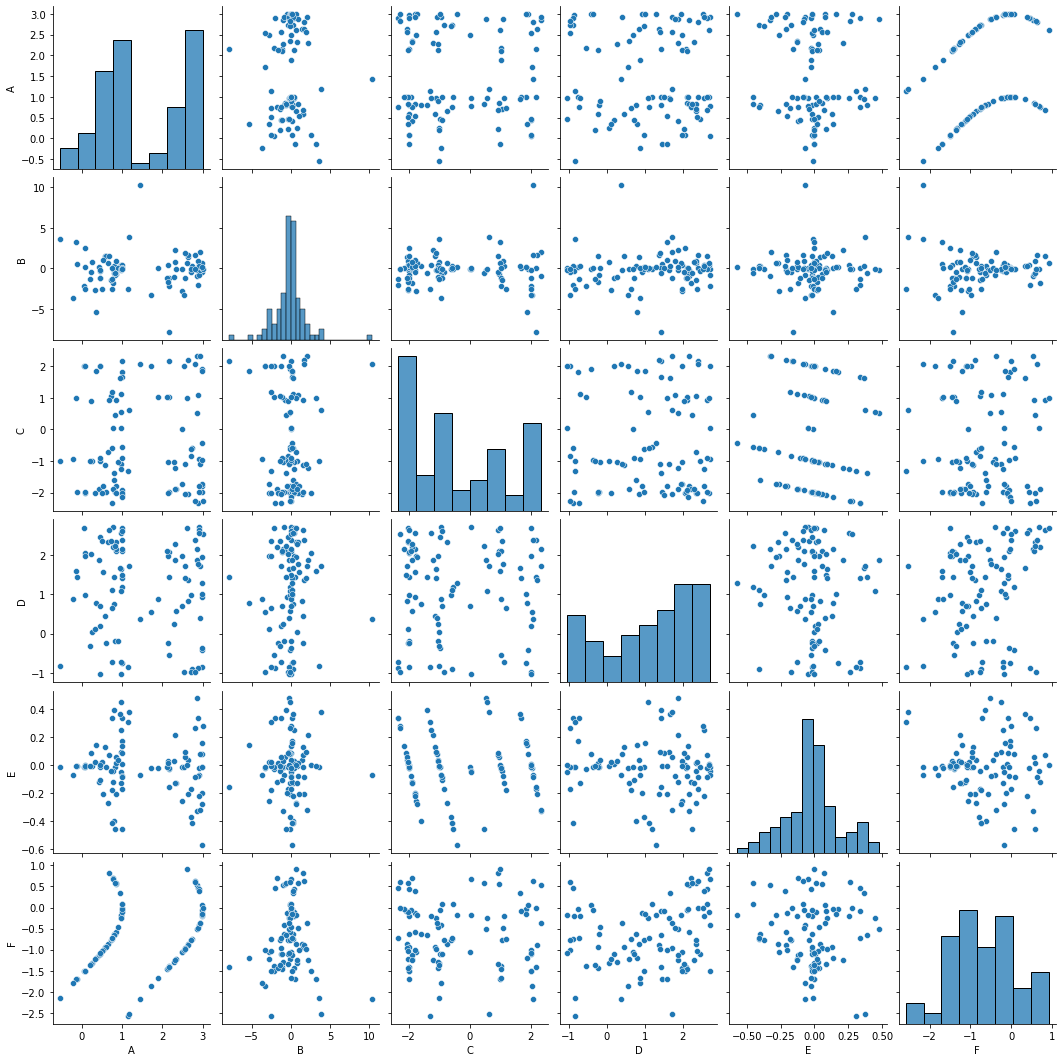

In [51]:
#sns.set_style()
pair_plot = sns.pairplot(df)
plt.show()

pair_plot.figure.savefig("plots/pairplot_98_samples")

#fig = pair_plot.get_figure()
#fig.savefig("plots/pairplot_98_samples")

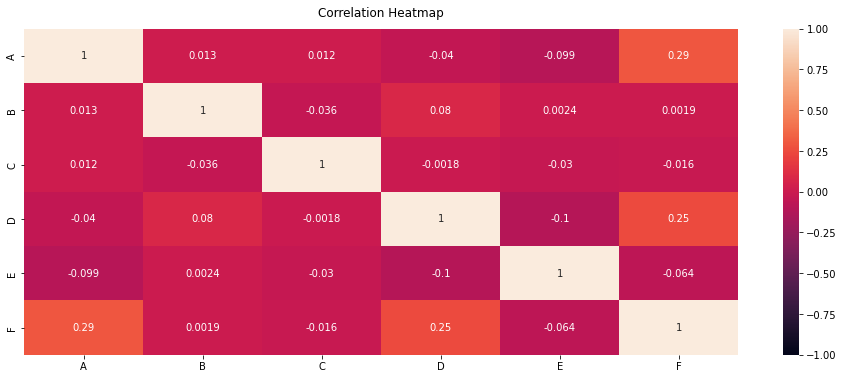

In [58]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.savefig('plots/heatmap.png', dpi=300) #bbox_inches='tight'


Correlation between x and y: 0.01


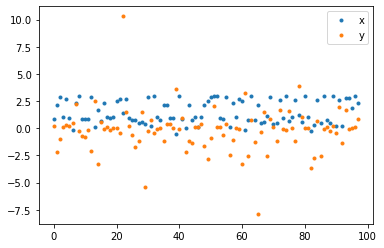

<Figure size 432x288 with 0 Axes>

In [70]:
A = df["A"]
B = df["B"]
C = df["C"]
D = df["D"]
E = df["E"]
F = df["F"]
plt.figure();
plt.plot(x,'.');
plt.plot(y,'.');
plt.legend(('x','y'));
#plt.xlabel(r'$\omega$');
print('Correlation between x and y: %.2f'%np.corrcoef(x,y)[0,1]);
plt.figure();


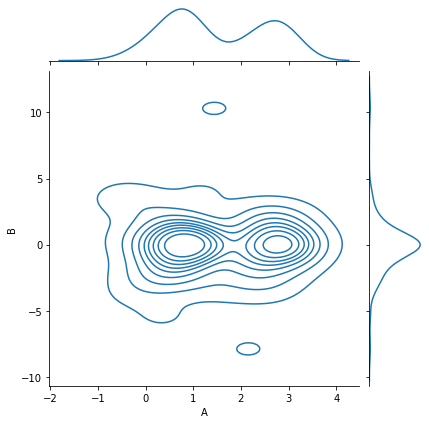

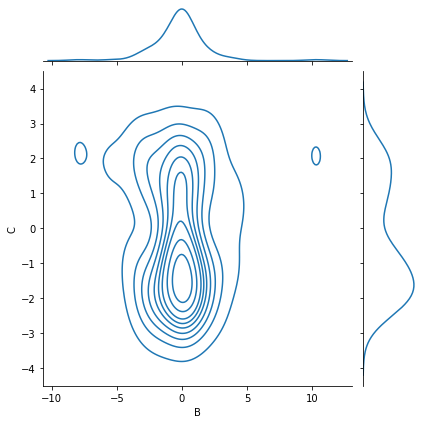

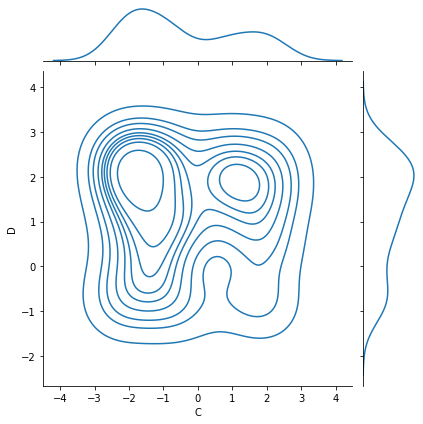

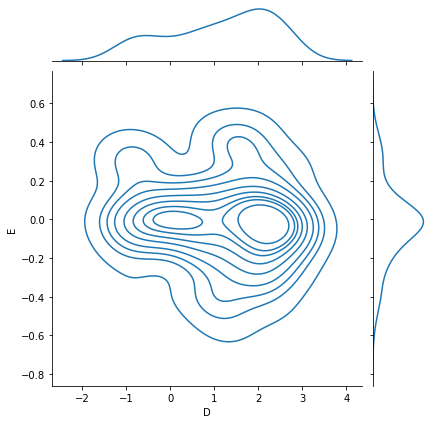

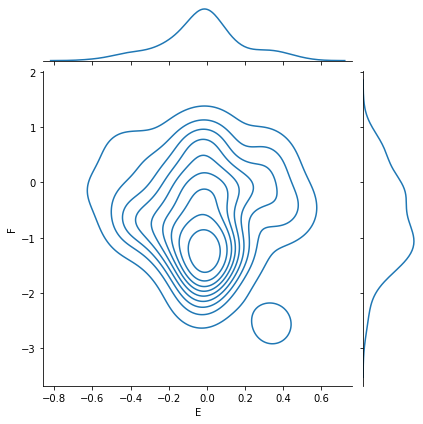

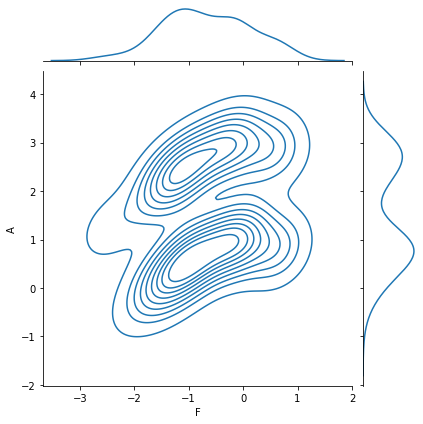

In [72]:
sns.jointplot(data={'A':A,'B':B},x='A',y='B',kind='kde');
sns.jointplot(data={'B':B,'C':C},x='B',y='C',kind='kde');
sns.jointplot(data={'C':C,'D':D},x='C',y='D',kind='kde');
sns.jointplot(data={'D':D,'E':E},x='D',y='E',kind='kde');
sns.jointplot(data={'E':E,'F':F},x='E',y='F',kind='kde');
sns.jointplot(data={'F':F,'A':A},x='F',y='A',kind='kde');
